<a href="https://colab.research.google.com/github/bleums/Data-Science-IA/blob/main/Inmersion_Datos_Aula_3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/inmuebles_bogota.csv')

In [ ]:
columnas = {'Baños':'Banios', 'Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banios        9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [ ]:
valor = inmuebles.Valor.str.split(expand=True)

In [ ]:
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio
3952,Apartamento,Apartamento en venta en Engativa,2,2,48,Engativa,Engativá,$ 210.000.000,$,210.000.000
9088,Apartamento,Apartamento en venta en Suba,3,3,131,Suba,Suba,$ 1.400.000.000,$,1.400.000.000
6219,Apartamento,Apartamento en venta en Kennedy,3,2,52,Kennedy,Kennedy Central,$ 152.000.000,$,152.000.000


In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banios        9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Hay que eliminar el punto en Precio para poder luego convertirlo en int64

In [ ]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','', regex=True)

In [ ]:
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [ ]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banios         9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
inmuebles.describe()

,Habitaciones,Banios,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [ ]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banios,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [ ]:
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


Encontramos la propiedad que tiene un dato anómalo. Donde hay una casa de 110 metros cuadrados con 110 habitaciones.

In [ ]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

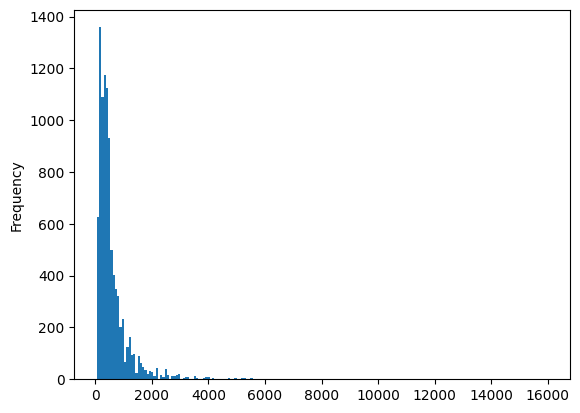

In [ ]:
inmuebles['Precio_Millon'].plot.hist(bins=200)

La mayor cantidad de inmuebles se ubican entre 0 y 2000 millones de pesos Colombianos

Usaremos matplotlib y seaborn para graficar

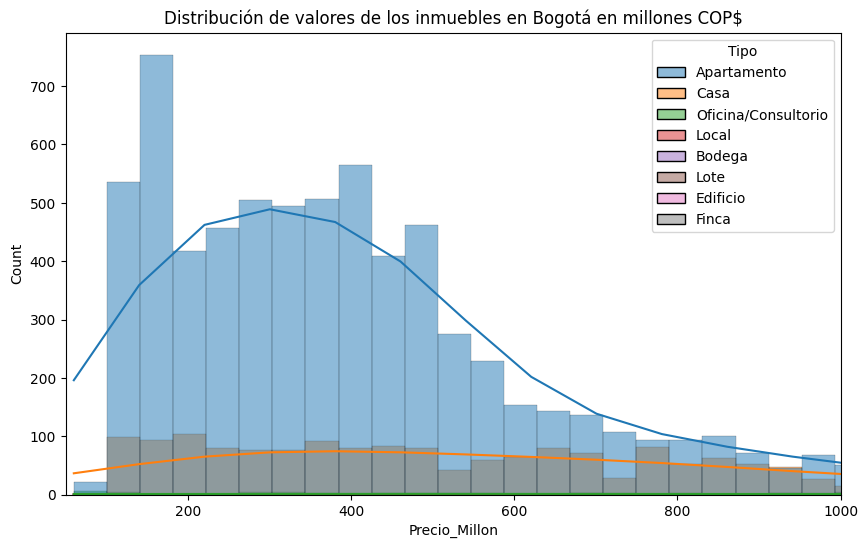

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo') #kde: curve of density
grafica.set_title('Distribución de valores de los inmuebles en Bogotá en millones COP$')

plt.xlim((50,1000)) # El límite mínimo y máximo para graficar en la variable X
#plt.ylim((0,20)) # Porque nos queremos enfocar en los otros tipos
plt.savefig('/content/drive/MyDrive/Inmersion_datos/graficos/valor_inmuebles.png',format='png')
plt.show()

Como el 75% de nuestros datos se encuentran entre 60 y 680 millones, cambiamos el xlim

# Solución Desafío durante Aula 3

1. Seleccionar y comparar el gráfico del histograma con tres tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de los labels)
2. Precio del m2 por barrio y escoger la gráfica que más se adecúe para esta nueva variable.
3. Conclusiones: cómo está el precio de los aptos vs las fincas y casas. Sacar insights

##2. Precio del metro cuadrado por barrio

In [ ]:
inmuebles['Precio_m2_Millon'] = inmuebles.Precio_Millon.astype('float')/inmuebles.Area
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Precio_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78


##Metro cuadrado por barrio

In [ ]:
inmuebles.groupby('Barrio').mean()

<ipython-input-19-7fb844af9b3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inmuebles.groupby('Barrio').mean()


,Habitaciones,Banios,Area,Precio_Millon,Precio_m2_Millon
Barrio,,,,,
Alameda,3.00,2.00,97.00,580.00,5.98
Alhambra,3.00,2.94,190.41,752.35,4.33
Andes Norte,3.00,2.86,124.86,709.57,6.05
Antonio Nariño,4.31,2.50,163.06,459.22,3.53
Barrancas,2.87,2.13,70.20,314.13,4.42
...,...,...,...,...,...
Villa Maria,4.69,3.69,207.15,402.85,2.04
Villas De Granada,3.45,2.32,86.59,282.30,3.17
Villemar,2.94,2.06,76.89,303.83,3.99


Vamos a sacar la media pero teniendo en cuenta la cantidad de inmuebles por barrio. Habremos entonces sumado las áreas de todos los inmuebles por barrio y a este dato sacarle el precio por metro cuadrado

In [ ]:
datos_barrio = inmuebles.groupby('Barrio').sum()
datos_barrio

<ipython-input-20-45bba8259daf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_barrio = inmuebles.groupby('Barrio').sum()


,Habitaciones,Banios,Area,Precio_Millon,Precio_m2_Millon
Barrio,,,,,
Alameda,3,2,97,580.00,5.98
Alhambra,51,50,3237,12790.00,73.56
Andes Norte,21,20,874,4967.00,42.35
Antonio Nariño,207,120,7827,22042.65,169.47
Barrancas,43,32,1053,4712.00,66.24
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58
Villas De Granada,76,51,1905,6210.62,69.71
Villemar,53,37,1384,5469.00,71.81


In [ ]:
datos_barrio['Valor_m2_Barrio'] = datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio

,Habitaciones,Banios,Area,Precio_Millon,Precio_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.00,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,3.95


Ya tenemos el valor del m2 por Barrio con respecto al promedio del propio barrio en sí

In [ ]:
m2_barrio = dict(datos_barrio['Valor_m2_Barrio'])

In [ ]:
inmuebles['Precio_Metro2'] = inmuebles['Barrio']
inmuebles['Precio_Metro2'] = inmuebles['Precio_Metro2'].map(m2_barrio)

In [ ]:
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Precio_m2_Millon,Precio_Metro2
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00,3.94,3.40
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00,7.78,8.10
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00,5.78,5.66
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00,7.58,6.29


Ahora la variable Precio_Metro2 ha sido reemplazada por el valor del metro cuadrado por millón correspondiente a todo el barrio, no solo un valor de media.

**Top Barrios**

In [ ]:
top_barrios = inmuebles['Barrio'].value_counts().head(10).index

In [ ]:
datos_barrio.reset_index(inplace=True)

In [ ]:
datos_barrio

,Barrio,Habitaciones,Banios,Area,Precio_Millon,Precio_m2_Millon,Valor_m2_Barrio
0,Alameda,3,2,97,580.00,5.98,5.98
1,Alhambra,51,50,3237,12790.00,73.56,3.95
2,Andes Norte,21,20,874,4967.00,42.35,5.68
3,Antonio Nariño,207,120,7827,22042.65,169.47,2.82
4,Barrancas,43,32,1053,4712.00,66.24,4.47
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.00,26.58,1.94
145,Villas De Granada,76,51,1905,6210.62,69.71,3.26
146,Villemar,53,37,1384,5469.00,71.81,3.95
147,Zona Franca,2,1,54,160.00,2.96,2.96


In [ ]:
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banios,Area,Precio_Millon,Precio_m2_Millon,Valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.76,2070.61,2.96
10,Bosa,1743,789,34879,93400.56,1654.36,2.68
22,Cedritos,1458,1348,53711,270027.73,2853.23,5.03
24,Chapinero,892,913,81248,372130.93,2466.03,4.58
50,Engativa,1676,1077,59808,172711.73,1795.71,2.89
63,Kennedy,2151,1233,61475,207963.65,2127.66,3.38
125,Santa Barbara,1073,1162,54693,320097.80,2701.88,5.85
132,Suba,1497,1202,61615,266406.04,2000.72,4.32
138,Usaquén,3109,3044,148121,837710.36,6334.04,5.66
148,Zona Noroccidental,2778,2204,119084,544453.06,4049.16,4.57


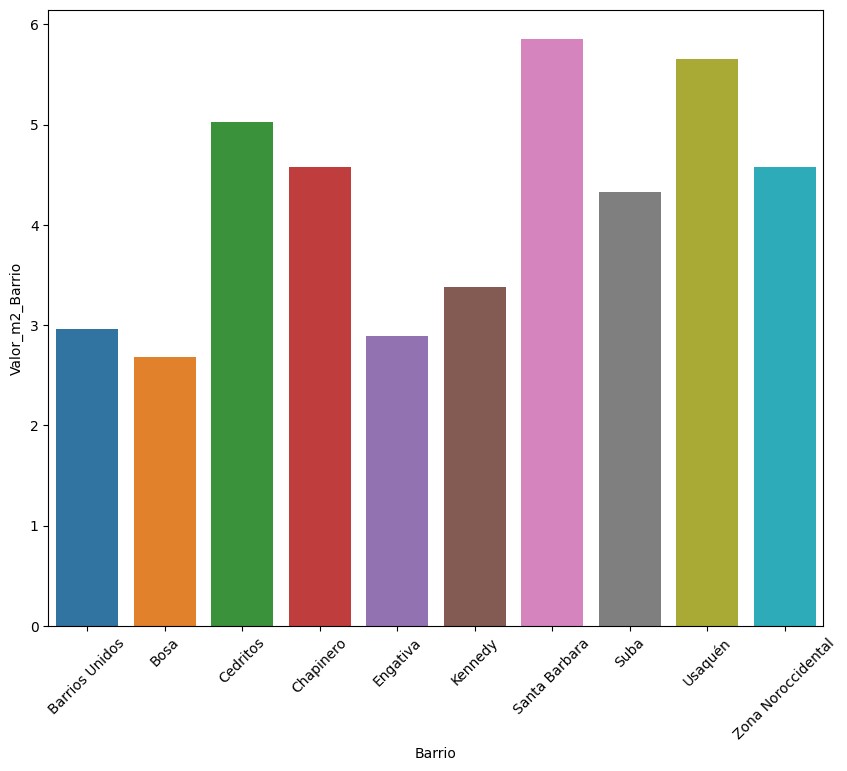

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Barrio', y='Valor_m2_Barrio',
                 data=datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)

Dentro del top 10 de los Barrios con más inmuebles en el dataset, el barrio Santa Bárbara es el que tiene los inmuebles con el valor más alto por metro cuadrado

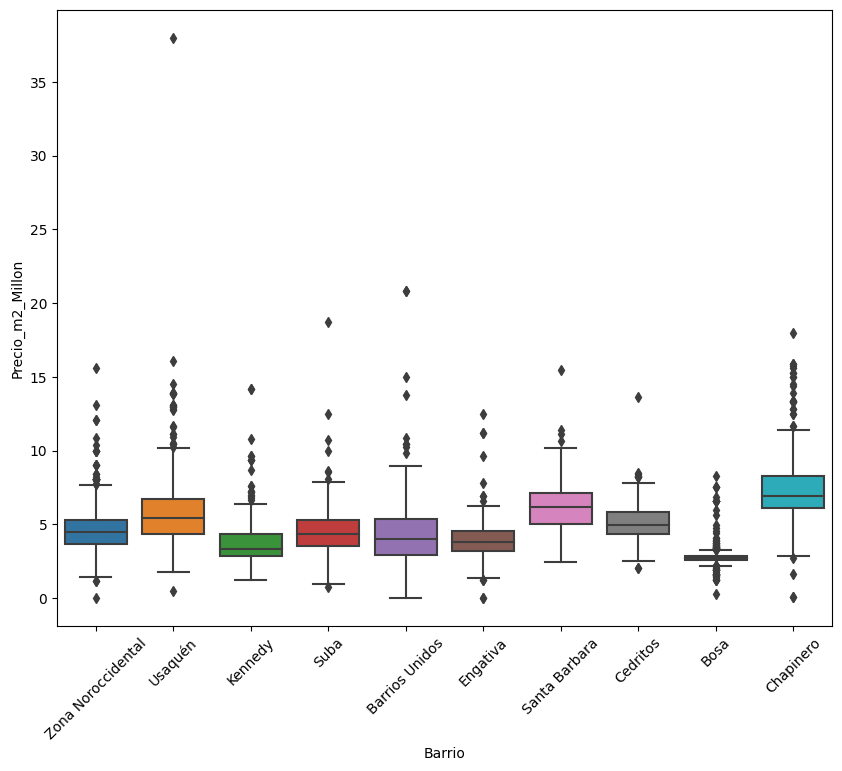

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_m2_Millon',
                 data=inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x', rotation=45)

plt.show()

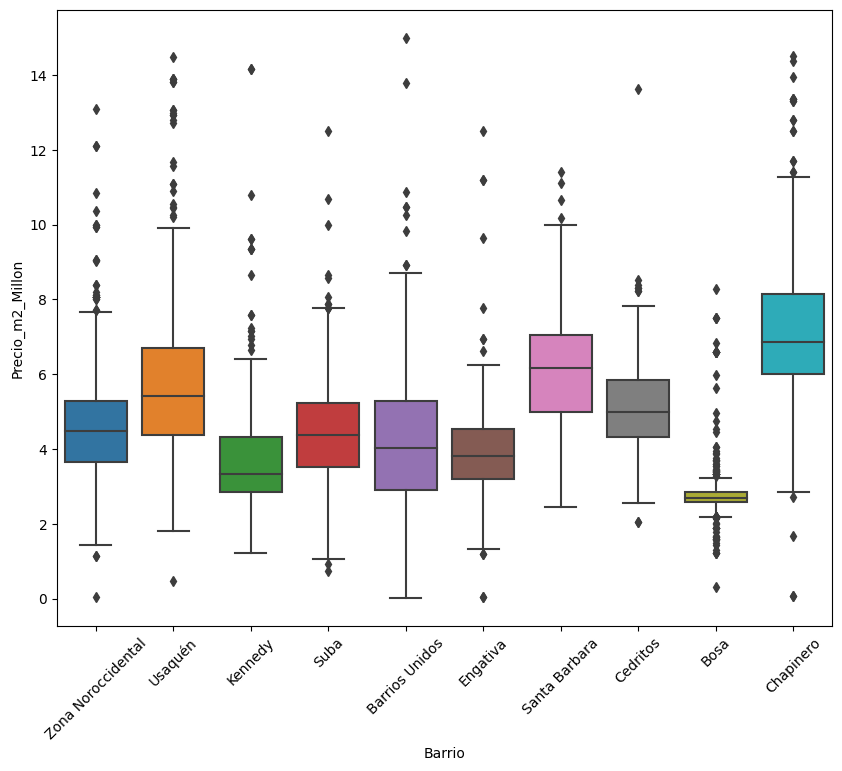

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_m2_Millon',
                 data=inmuebles.query('Barrio in @top_barrios & Precio_m2_Millon < 15'))
ax.tick_params(axis='x', rotation=45)

plt.show()

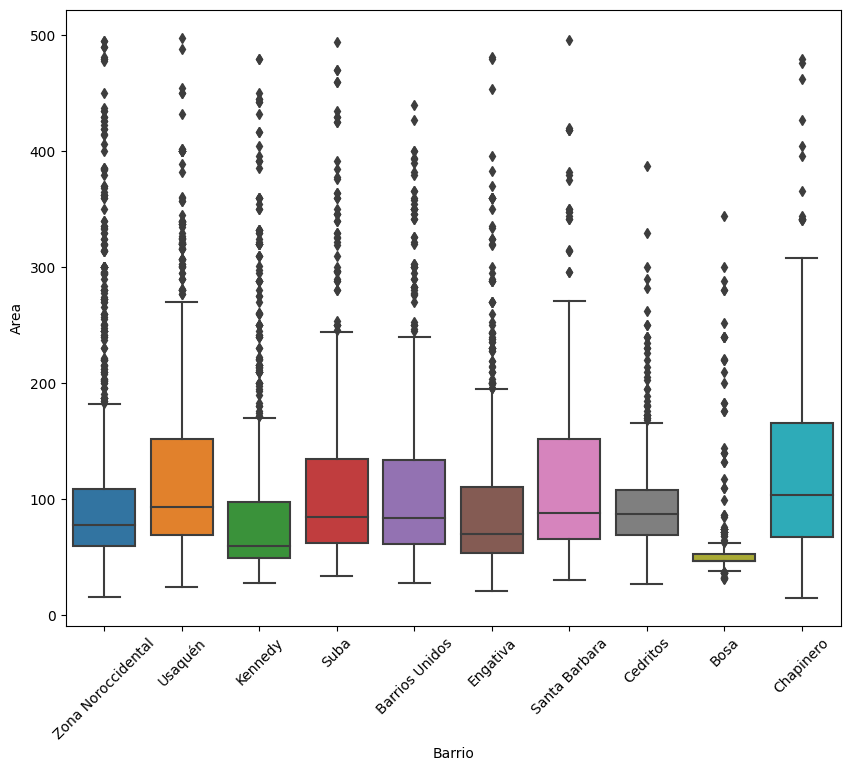

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Area',
                 data=inmuebles.query('Barrio in @top_barrios & Area < 500'))
ax.tick_params(axis='x', rotation=45)

plt.show()

Hay que estar atentos a los datos outliers para que no perjudiquen el desempeño del modelo.
eN Chapinero se nota que la media está por encima del resto, por lo que el área de los apartamentos en este barrio son más grandes que el promedio de los 10 dibujados. Mientras que en Kennedy son menores a la mediana.

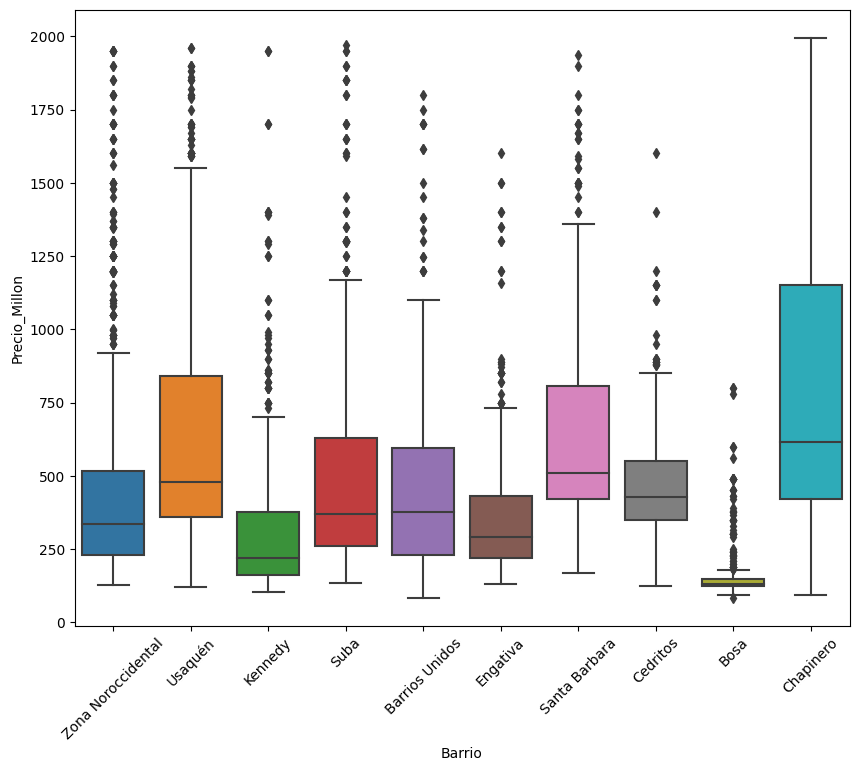

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Barrio', y='Precio_Millon',
                 data=inmuebles.query('Barrio in @top_barrios & Precio_Millon < 2000'))
ax.tick_params(axis='x', rotation=45)

plt.show()

Del top de barrios que tienen más inmuebles en el conjunto de datoss, Chapinero es el barrio con apartamentos o inmuebles más grandes por área, más costosos por precio por metro cuadrado y más costoso en general.

In [ ]:
datos_raw = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Identificaciขn (Capกtulo A).csv', sep=';', encoding='latin-1')
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [ ]:
datos_raw.shape

(106467, 11)

In [ ]:
datos_raw = datos_raw.loc[datos_raw.MPIO == 11001]
datos_raw.shape

(86504, 11)

In [ ]:
datos_b = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Datos de la vivenda y su entorno (Cap¡tulo B).csv', sep=';', encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Condiciones habitacionales del hogar (Cap¡tulo C).csv', sep=';', encoding='latin-1')
datos_e = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep=';', encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Educaciขn (Capกtulo H).csv', sep=';', encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Percepciขn sobre las condiciones de vida y el desempeคo institucional (Capกtulo L).csv', sep=';', encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Fuerza de trabajo (Cap¡tulo K).csv', sep=';', encoding='latin-1')


<ipython-input-37-1ef52bcade73>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Condiciones habitacionales del hogar (Cap¡tulo C).csv', sep=';', encoding='latin-1')
<ipython-input-37-1ef52bcade73>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Composiciขn del hogar y demografกa (Capกtulo E).csv', sep=';', encoding='latin-1')
<ipython-input-37-1ef52bcade73>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/Educaciขn (Capกtulo H).csv', sep=';', encoding='latin-1')
<ipython-input-37-1ef52bcade73>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=False.
  dat

In [ ]:
datos_dane = pd.merge(datos_raw,datos_b, on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_c, on='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')
datos_dane.shape

<ipython-input-40-9f757f86689d>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_e, on='DIRECTORIO', how='left')


(238559, 281)

Solo vamos a dejar hasta el join con la base de datos dane_e porque superaremos entonces los recursos disponibles de la máquina dispuesta por Google Colab

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


In [ ]:
datos_dane.describe()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,COD_UPZ_GRUPO,ESTRATO2021,NVCBP1,NVCBP2,NVCBP3,...,NPCEP21A,NPCEP22,NPCEP22A,NPCEP24,NPCEP24A,NPCEP25,NPCEP25A,NPCEP27,NPCEP26,NPCEP29
count,238559.00,238559.00,238559.00,238559.00,238559.00,230093.00,238559.00,238559.00,214071.00,238559.00,...,50898.00,187661.00,127727.00,238559.00,86189.00,152370.00,109725.00,188917.00,188917.00,218.00
mean,1119935.88,11.00,11001.00,1.07,9.56,175.71,11001150.43,2.89,1.18,1.12,...,1.37,24.22,6.05,1.86,1.72,18.56,5.94,1.01,1.00,1.76
std,647241.33,0.00,0.00,0.36,5.33,273.15,29.81,1.12,0.45,0.32,...,0.76,39.46,3.19,0.75,0.88,35.09,3.17,0.14,0.03,0.86
min,166238.00,11.00,11001.00,1.00,1.00,9.00,11001101.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,994678.00,11.00,11001.00,1.00,5.00,39.00,11001125.00,2.00,1.00,1.00,...,1.00,1.00,5.00,1.00,1.00,1.00,4.00,1.00,1.00,1.00
50%,1053154.00,11.00,11001.00,1.00,9.00,70.00,11001150.00,3.00,1.00,1.00,...,1.00,3.00,5.00,2.00,2.00,3.00,5.00,1.00,1.00,1.00
75%,1152132.00,11.00,11001.00,1.00,13.00,98.00,11001175.00,4.00,1.00,1.00,...,2.00,10.00,9.00,2.00,2.00,10.00,9.00,1.00,1.00,3.00
max,3006812.00,11.00,11001.00,3.00,20.00,817.00,11001220.00,4.00,3.00,2.00,...,12.00,99.00,13.00,3.00,13.00,99.00,13.00,3.00,2.00,3.00


In [ ]:
datos_dane.sample(5)

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,...,NPCEP22A,NPCEP24,NPCEP24A,NPCEP25,NPCEP25A,NPCEP27,NPCEP26,NPCEP29,NPCEP29A,FEX_C_y
97092,1029427.00,11,11001,1,8.00,Kennedy,79.00,Calandaima,11001110,Calandaima,...,11.00,2,NaN,5.00,2.00,1.00,1.00,NaN,NaN,"48,3404586774291"
148863,1105853.00,11,11001,1,11.00,Suba,20.00,La Alhambra,11001195,La Alhambra,...,NaN,1,2.00,NaN,NaN,1.00,1.00,NaN,NaN,"17,63185192287"
116579,1043348.00,11,11001,1,10.00,Engativá,30.00,Boyacá Real,11001108,Boyacá Real,...,1.00,3,NaN,1.00,1.00,1.00,1.00,NaN,NaN,"41,1006471277122"
141797,1066108.00,11,11001,1,11.00,Suba,23.00,Casa Blanca Suba,11001112,Casa Blanca Suba,...,2.00,1,1.00,NaN,NaN,1.00,1.00,NaN,NaN,"23,0987578084094"
176603,1147558.00,11,11001,1,3.00,Santa Fe,95.00,Las Cruces,11001139,Las Cruces,...,NaN,1,2.00,NaN,NaN,1.00,1.00,NaN,NaN,"11,5726411882767"


#Aula 4
Los datos del DANE fueron obtenidos de este enlace: https://microdatos.dane.gov.co/index.php/catalog/743/get-microdata


In [ ]:
datos_b.DIRECTORIO

0        3005117.00
1        3005118.00
2        3005119.00
3        3005120.00
4        3005121.00
            ...    
106462   3005112.00
106463   3005113.00
106464   3005114.00
106465   3005115.00
106466   3005116.00
Name: DIRECTORIO, Length: 106467, dtype: float64

Vamos a usar un nuevo archivo csv previamente refinado a partir de la base de datos anterior, para fines de este taller

In [ ]:
datos_dane = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/datos_dane.csv')
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [ ]:
datos_dane.shape

(9857, 55)

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


Renombramos las variables con base en la documentación ofrecida por el DANE para las mismas.
Esta documentación se encuentra en el siguiente enlace https://microdatos.dane.gov.co/catalog/743

In [ ]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO',
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES',
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES',
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA',
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19',
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA',
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO',
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA',
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO',
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO',
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [ ]:
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


In [ ]:
datos = datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.00,1.00,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.00,1.00,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.00,1.00,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.00,1.00,0,1,0


In [ ]:
datos.loc[datos.NOMBRE_ESTRATO == '20 de Julio']

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
513,20 de Julio,0,0,0,0,1,0,98.00,1.00,0,1,0
706,20 de Julio,0,1,0,0,1,0,908000.00,1.00,0,0,1
707,20 de Julio,0,1,0,0,1,0,1800000.00,1.00,0,0,0
708,20 de Julio,0,1,0,0,1,0,1200000.00,1.00,0,0,0
709,20 de Julio,0,1,0,1,1,0,2000000.00,1.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,20 de Julio,0,1,0,0,0,1,400000.00,1.00,1,1,1
8751,20 de Julio,0,0,0,0,0,0,906000.00,1.00,0,0,1
8752,20 de Julio,0,1,0,0,0,1,1200000.00,1.00,0,0,0
8783,20 de Julio,0,1,1,0,0,0,1200000.00,1.00,0,0,1


In [ ]:
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()

In [ ]:
pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


In [ ]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

In [ ]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banios                    9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Moneda                    9520 non-null   object 
 9   Precio                    9520 non-null   object 
 10  Precio_Millon             9520 non-null   float64
 11  Precio_m2_Millon          9520 non-null   float64
 12  Precio_Metro2             9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

Vamos a asignar los códigos numéricos de las UPZ a la variable UPZ para que sea un int y no un object

In [ ]:
upz = pd.read_csv('/content/drive/MyDrive/Inmersion_datos/cod_upz.csv')

In [ ]:
upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00


In [ ]:
datos_ml = pd.merge(datos_ml, upz, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='inner')
# Solo traerá los inmuebles que estén en barrios que se encuentren dentro de alguna UPZ, si no están en ninguna UPZ, entonces no los tendrá en cuenta
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [ ]:
datos_ml.shape

(9318, 26)

In [ ]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banios                    9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Moneda                    9318 non-null   object 
 9   Precio                    9318 non-null   object 
 10  Precio_Millon             9318 non-null   float64
 11  Precio_m2_Millon          9318 non-null   float64
 12  Precio_Metro2             9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

**Graficamos**

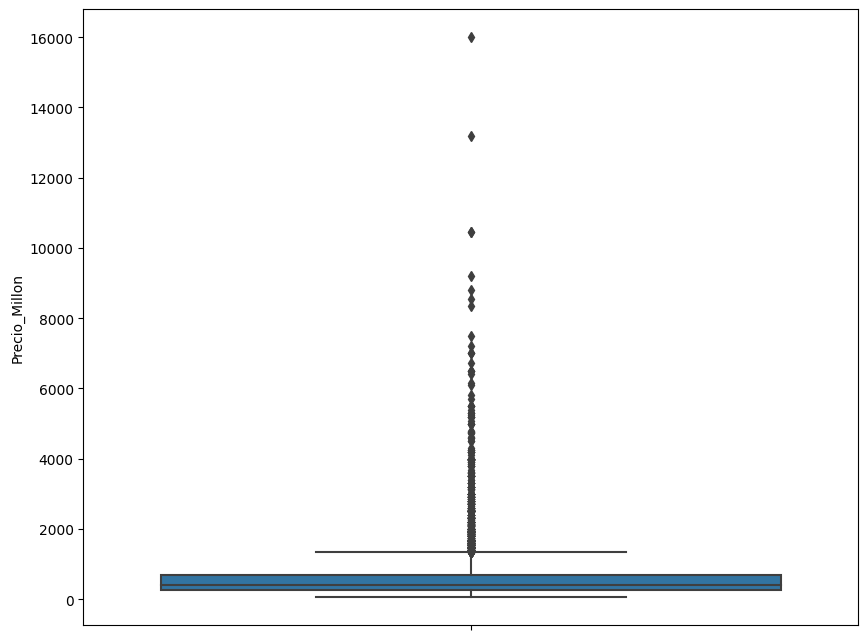

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml,
            y='Precio_Millon')

plt.show()

Vamos a eliminar datos outliers para que no afecten fuertemente el entrenamiento del modelo

In [ ]:
datos_ml.query('Precio_Millon > 5000 | Precio_Millon < 60')

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000,...,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07,CHAPINERO: Chicó Lago + El Refugio,817.00


In [ ]:
datos_ml = datos_ml.query('Precio_Millon < 1200 & Precio_Millon > 60')
datos_ml

,Tipo,Descripcion,Habitaciones,Banios,Area,Barrio,UPZ,Valor,Moneda,Precio,...,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
9,Casa,Casa en venta en Zona Noroccidental,5,2,200,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 580.000.000,$,580000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
10,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 278.000.000,$,278000000,...,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00,48.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09,Verbenal,9.00,29.34


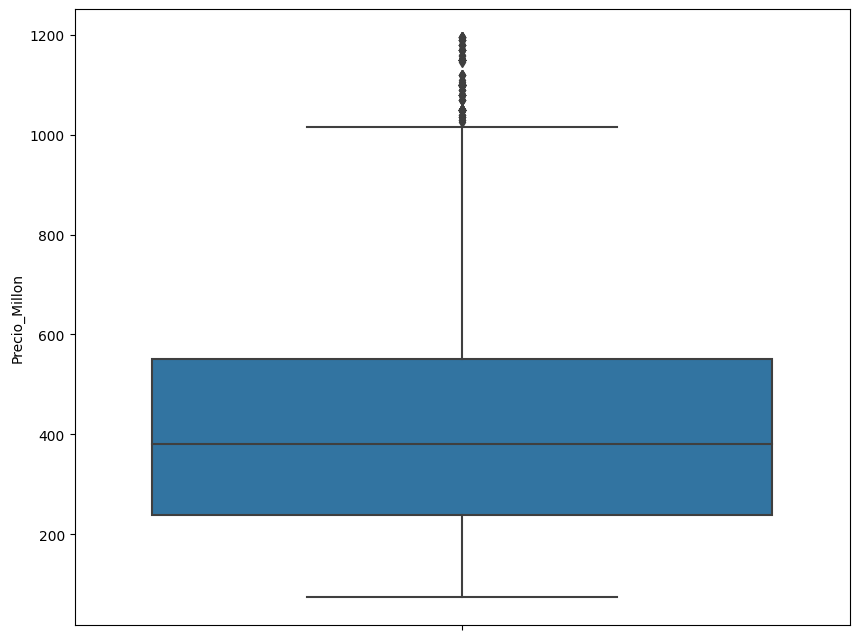

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=datos_ml,
            y='Precio_Millon')

plt.show()

Vamos a incluir el salario anual y formatear el dato

In [ ]:
datos_ml['SALARIO_ANUAL_MI'] = (datos_ml['SALARIO_MES']*12)/1000000 #Formateo simple para eliminar la notación de millones
datos_ml['SALARIO_ANUAL_MI']

<ipython-input-103-8e90b9328d63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_ml['SALARIO_ANUAL_MI'] = (datos_ml['SALARIO_MES']*12)/1000000 #Formateo simple para eliminar la notación de millones


0      48.42
1      48.42
3      48.42
9      48.42
10     48.42
        ... 
9313   29.34
9314   29.34
9315   29.34
9316   29.34
9317   29.34
Name: SALARIO_ANUAL_MI, Length: 8313, dtype: float64

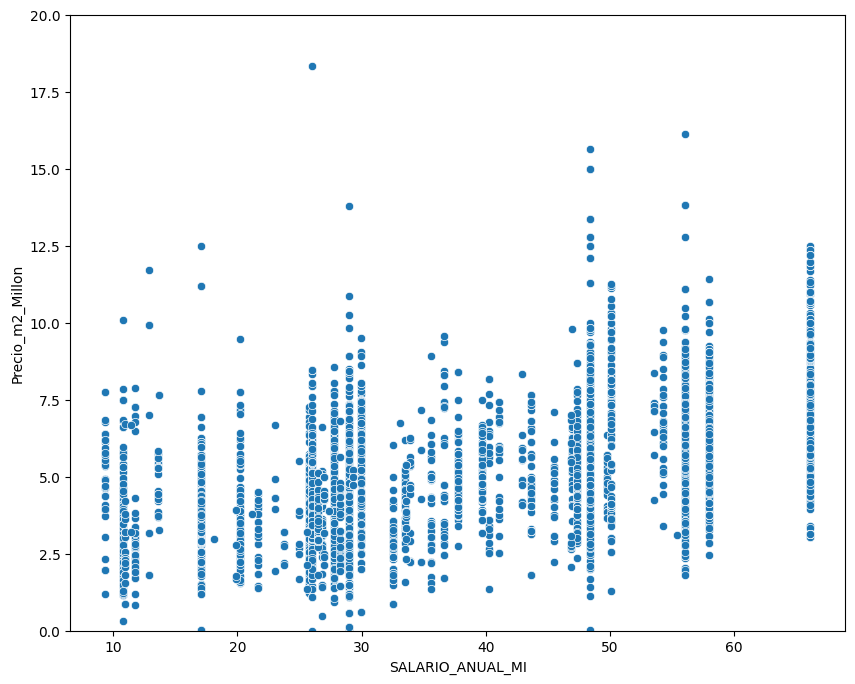

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml,
            x='SALARIO_ANUAL_MI',
            y='Precio_m2_Millon')
plt.ylim((0,20))

plt.show()

A simple vista no parece haber alguna correlación entre estas dos variables. Por lo que usaremos una función de pandas para determinar ciertamente esta correlación

In [ ]:
datos_ml.corr()

<ipython-input-105-06e284398928>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ml.corr()


,Habitaciones,Banios,Area,Precio_Millon,Precio_m2_Millon,Precio_Metro2,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.44,0.03,0.18,-0.31,-0.21,-0.12,0.13,0.08,0.11,0.14,0.11,-0.17,-0.08,0.07,0.13,0.09,-0.12,-0.17
Banios,0.44,1.00,0.04,0.66,-0.03,0.13,0.16,-0.19,-0.17,-0.12,-0.17,-0.21,0.18,0.13,-0.09,-0.15,-0.08,0.01,0.18
Area,0.03,0.04,1.00,0.04,-0.04,-0.04,-0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.01,-0.01,-0.01
Precio_Millon,0.18,0.66,0.04,1.00,0.36,0.40,0.32,-0.37,-0.28,-0.23,-0.35,-0.38,0.42,0.21,-0.17,-0.32,-0.18,0.17,0.42
Precio_m2_Millon,-0.31,-0.03,-0.04,0.36,1.00,0.49,0.33,-0.37,-0.29,-0.22,-0.37,-0.35,0.46,0.23,-0.20,-0.36,-0.21,0.26,0.46
Precio_Metro2,-0.21,0.13,-0.04,0.40,0.49,1.00,0.65,-0.66,-0.38,-0.41,-0.66,-0.60,0.82,0.41,-0.31,-0.65,-0.23,0.41,0.82
CONJUNTO_CERRADO,-0.12,0.16,-0.01,0.32,0.33,0.65,1.00,-0.84,-0.30,-0.51,-0.70,-0.67,0.81,0.61,-0.35,-0.78,0.05,0.08,0.81
INSEGURIDAD,0.13,-0.19,-0.00,-0.37,-0.37,-0.66,-0.84,1.00,0.51,0.60,0.85,0.75,-0.82,-0.56,0.29,0.74,0.09,0.00,-0.82
TERMINALES_BUS,0.08,-0.17,-0.01,-0.28,-0.29,-0.38,-0.30,0.51,1.00,0.39,0.67,0.57,-0.51,-0.30,0.17,0.36,0.25,-0.09,-0.51
BARES_DISCO,0.11,-0.12,-0.01,-0.23,-0.22,-0.41,-0.51,0.60,0.39,1.00,0.60,0.49,-0.38,-0.25,-0.02,0.33,-0.05,0.26,-0.38


<ipython-input-106-eafa0665ea9a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


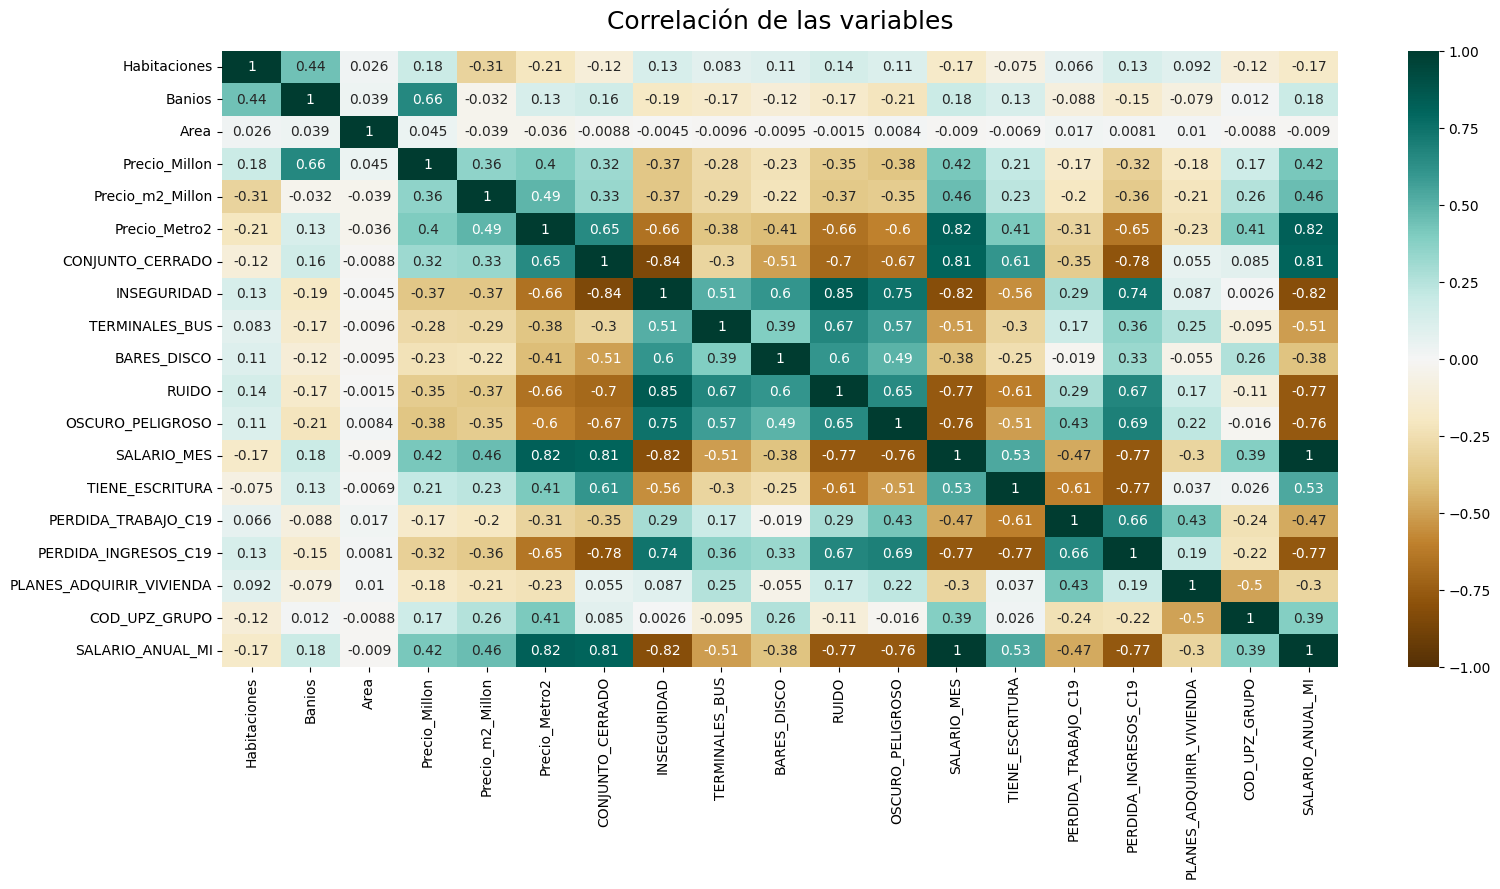

In [ ]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':18}, pad=16);

#REGRESSION - ML

Usaremos scikit-learn. Queremos predecir el precio en millones de los inmuebles.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Cómo influye que el inmueble esté ubicado en cierta UPZ en el precio final
X = datos_ml[['COD_UPZ_GRUPO']]
y = datos_ml['Precio_Millon']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99) # Probamos con el 75% y testeamos con el 25%. La semilla pseudoaleatoria para que cada vez que se ejecute sea diferente

In [ ]:
X_train

,COD_UPZ_GRUPO
1512,817.00
7864,85.00
6058,21.00
1683,817.00
2481,14.00
...,...
6038,21.00
8875,102.00
2200,14.00
3883,803.00


In [ ]:
X_test

,COD_UPZ_GRUPO
6340,74.00
7805,85.00
4902,47.00
7041,100.00
2436,14.00
...,...
3323,14.00
3945,803.00
5572,27.00
3633,803.00


In [ ]:
y_train

1512   1050.00
7864    129.00
6058    206.38
1683    650.00
2481    250.00
         ...  
6038    560.00
8875    560.00
2200    685.00
3883    850.00
8154    132.00
Name: Precio_Millon, Length: 6234, dtype: float64

In [ ]:
y_test

6340   199.90
7805   120.80
4902   400.00
7041   340.00
2436   355.00
        ...  
3323   700.00
3945   510.00
5572   220.00
3633   420.00
3652   435.60
Name: Precio_Millon, Length: 2079, dtype: float64

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict_test = modelo.predict(X_test)

Usaremos las métricas de MAE (Error Absoluto Medio) y R^2, para evaluar el modelo.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

baseline_mae = mean_absolute_error(y_test, y_predict_test) # Compara los datos que el modelo no ha conocido con los predichos
print(baseline_mae)
baseline_r2 = r2_score(y_test, y_predict_test)
print(baseline_r2)

187.323609443345
0.031111799984413713


De momento no se está desempeñando bien, pues solo tuvimos en cuenta un atributo o variable para entrenar el modelo. De modo que el error MAE es de alrededor de 349 millones de COP, y el R2 está bastante lejos de cero.

In [ ]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banios','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']]

y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)

# Métricas
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print(mae_test,r2_test) # Validación con los datos de prueba
print(mae_train,r2_train) # Validación con los datos de entrenamiento

118.25967274431333 0.5404735562069192
123.22271988681676 0.5269614226488988


Vamos a pasarle ciertos valores para un registro y ver cómo lo predice el modelo. A modo de prueba

In [ ]:
modelo_1.predict([[816,3,2,1,50,1]]) #Estos valores corresponden a las variables con las que entrenamos el modelo: 'COD_UPZ_GRUPO','Habitaciones','Banios','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([434.21129691])

Documentación:
- Guía de la Inmersión de Datos: https://github.com/alura-es-cursos/inmersion-en-datos/blob/aula-4/INMERSION_DATOS_PROYECTO_FINAL.ipynb